In [1]:
import numpy as np
import pycaret
from pycaret.regression import *
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('./01_Melbourne_Residential.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


# Task 1: Exploratory Data Analysis


In [20]:
# Inspect data types, shape, and summaries
print(df.shape)
df.info()
df.describe()

(13580, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Suburb                 13580 non-null  object 
 1   Address                13580 non-null  object 
 2   Rooms                  13580 non-null  int64  
 3   Property_Type          13580 non-null  object 
 4   Price_Dollars          13580 non-null  int64  
 5   Sale_Method            13580 non-null  object 
 6   Real_Estate_Agent      13580 non-null  object 
 7   Sale_Date              13580 non-null  object 
 8   Distance_to_CBD_km     13580 non-null  float64
 9   Postal_Code            13580 non-null  int64  
 10  Scraped_Bedrooms       13580 non-null  int64  
 11  Bathrooms              13580 non-null  int64  
 12  Parking_Spaces         13518 non-null  float64
 13  Land_Size              13580 non-null  int64  
 14  Building_Size          7130 non-null   flo

,Rooms,Price_Dollars,Distance_to_CBD_km,Postal_Code,Scraped_Bedrooms,Bathrooms,Parking_Spaces,Land_Size,Building_Size,Year_Built,Lattitude,Longtitude,Suburb_Property_Count
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64


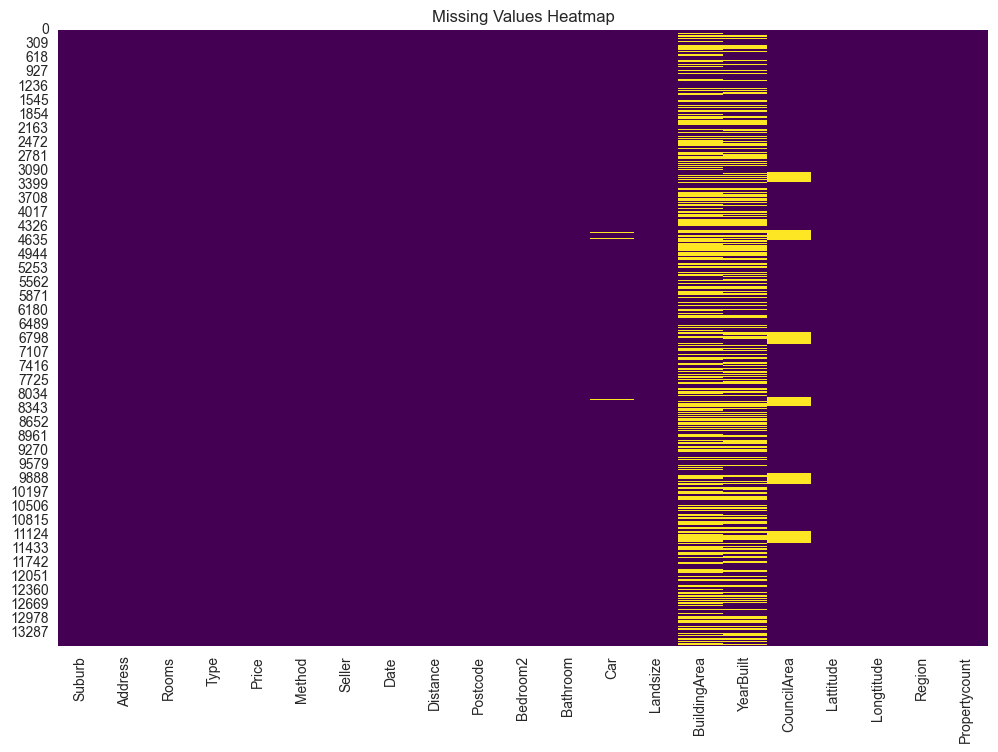

In [8]:
# Check for missing values
missing = df.isnull().sum()
print(missing[missing > 0])
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
# Check for duplicates
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 0


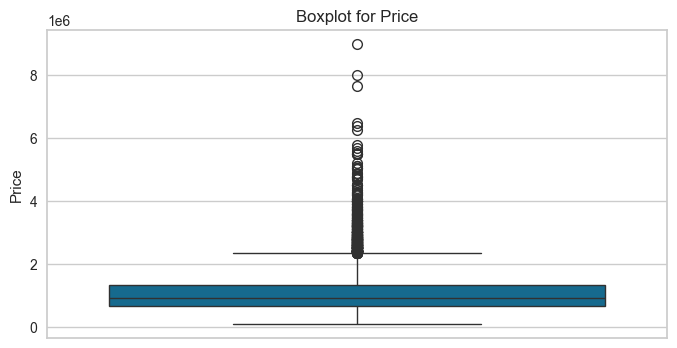

2.2396243125298727


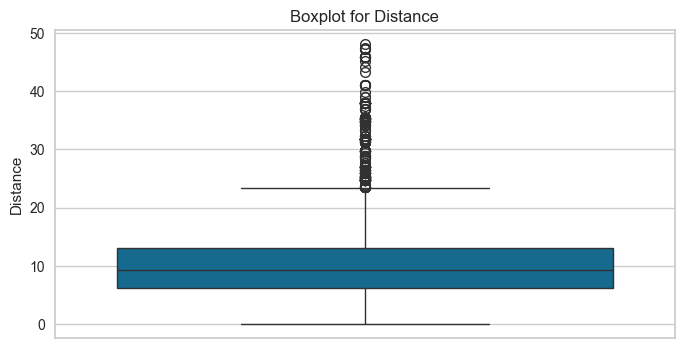

1.6769370831513803


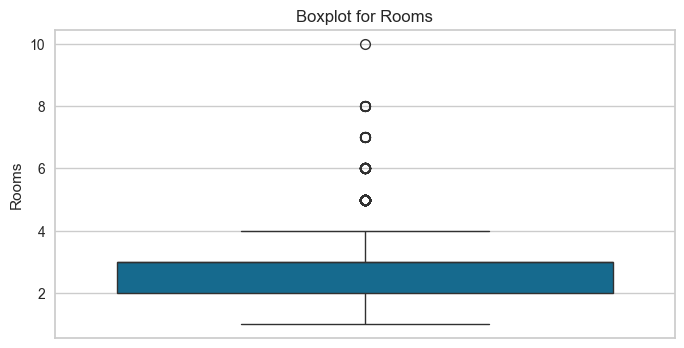

0.37647803278204356


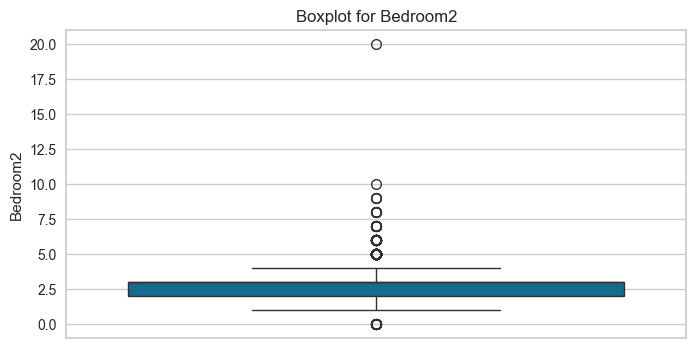

0.7740822106314001


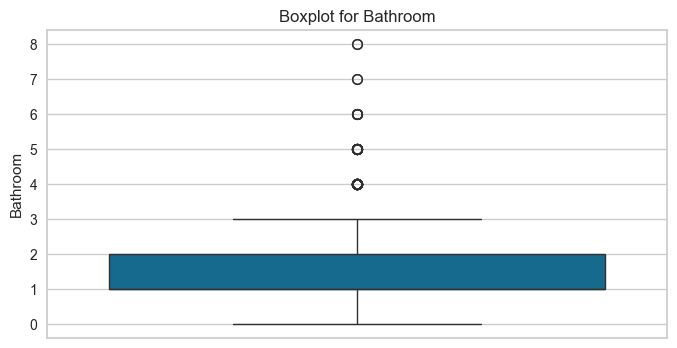

1.3774059717074525


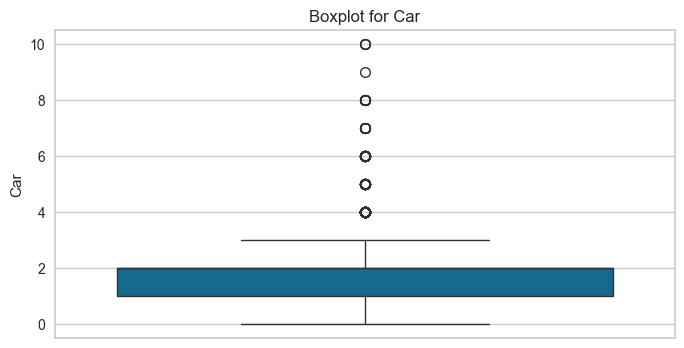

1.3696759255976967


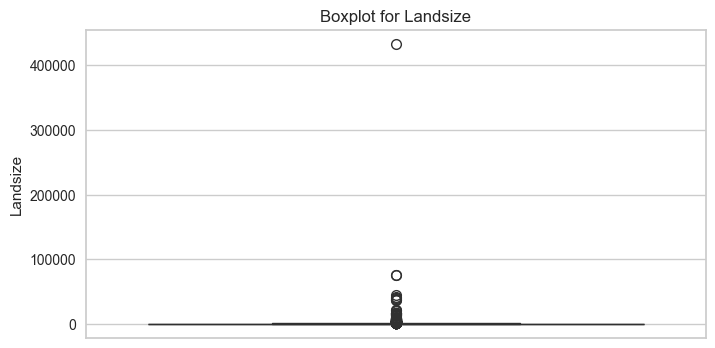

95.23740045101685


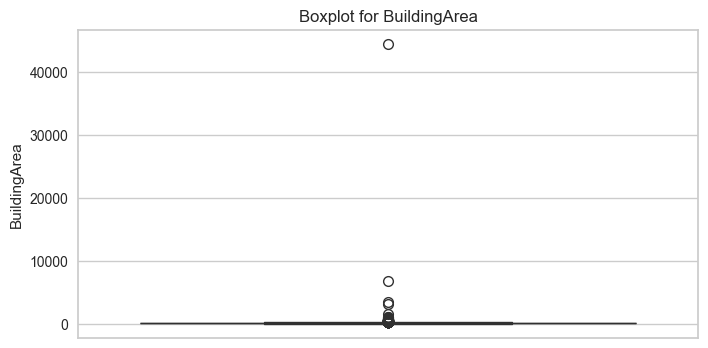

77.69154091544218


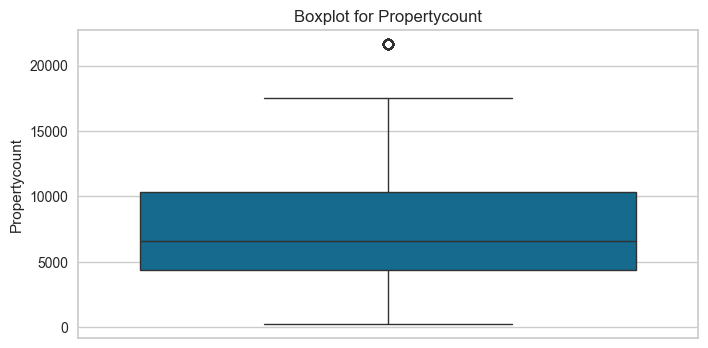

1.069339348575951


In [14]:
# Detect outliers using boxplots
num_cols = ['Price', 'Distance', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    print(df[col].skew())

Skewness for price, distance, bathroom, car, landsize, buildingArea and Propertycount exceeds 1 (>1) which means transformation will be beneficial.

## Further Inspection of Outlier

In [10]:
# Code to find row with BuildingArea > 40000
print("Row with BuildingArea > 40000:")
df[df['BuildingArea'] > 40000]

Row with BuildingArea > 40000:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
9936,New Gisborne,71 Hamilton Rd,5,h,1355000,S,Raine,23/09/2024,48.1,3438,...,3,5.0,44500,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849


In [11]:
# Code to find row with Car = 10
print("\nRow with Car = 10:")
df[df['Car'] == 10]


Row with Car = 10:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
6955,Bayswater,95 Orange Gr,4,h,925000,SP,Biggin,17/06/2024,23.2,3153,...,1,10.0,993,128.0,1966.0,Knox,-37.84688,145.25632,Eastern Metropolitan,5030
9255,Dandenong,1462 Heatherton Rd,3,h,880000,S,Barry,22/07/2024,24.7,3175,...,2,10.0,734,NaN,NaN,Greater Dandenong,-37.96969,145.21043,South-Eastern Metropolitan,10894
11253,Reservoir,1 Don St,4,h,1112000,S,RW,26/08/2024,12.0,3073,...,2,10.0,1002,170.0,1985.0,NaN,-37.70671,145.03086,Northern Metropolitan,21650


In [12]:
# Code to find row with Landsize > 400000
print("\nRow with Landsize > 400000:")
df[df['Landsize'] > 400000]


Row with Landsize > 400000:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
4895,Fitzroy,389 Gore St,3,h,2700000,VB,Kay,12/8/2024,2.1,3065,...,3,1.0,433014,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825


In [13]:
#Code to find row with Bedroom2 = 20
print("\nRow with Bedroom2 = 20:")
df[df['Bedroom2'] == 20]


Row with Bedroom2 = 20:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
888,Caulfield East,5 Grange Rd,3,h,1650000,PI,Woodards,6/8/2023,9.3,3145,...,1,2.0,875,NaN,NaN,Glen Eira,-37.8815,145.0491,Southern Metropolitan,608


In [26]:
# Code to find row with Propertycount > 20000
print("\nRow with Propertycount > 20000:")
df[df['Propertycount'] > 20000]


Row with Propertycount > 20000:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
160,Reservoir,1/21 Dumbarton St,3,u,475000,S,Ray,3/9/2023,11.2,3073,...,1,1.0,191,107.0,1990.0,Darebin,-37.70190,145.02560,Northern Metropolitan,21650
161,Reservoir,1/147 Purinuan Rd,2,u,415000,PI,Ray,3/9/2023,11.2,3073,...,1,1.0,189,84.0,2012.0,Darebin,-37.70800,145.01810,Northern Metropolitan,21650
406,Reservoir,30 Ashton St,3,h,731000,S,Barry,3/12/2023,11.2,3073,...,1,2.0,779,138.0,1950.0,Darebin,-37.72920,145.02140,Northern Metropolitan,21650
407,Reservoir,2/20 Crookston Rd,2,u,352000,SP,Barry,3/12/2023,11.2,3073,...,1,1.0,117,62.0,2012.0,Darebin,-37.71010,145.02230,Northern Metropolitan,21650
408,Reservoir,19 Drysdale St,3,h,723000,S,Ray,3/12/2023,11.2,3073,...,1,1.0,535,86.0,1950.0,Darebin,-37.72990,145.02420,Northern Metropolitan,21650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13330,Reservoir,2 Moira Av,3,h,605000,SP,Love,29/07/2024,12.0,3073,...,1,1.0,540,NaN,NaN,Darebin,-37.69372,144.98058,Northern Metropolitan,21650
13331,Reservoir,1/33 Oconnor St,2,t,672000,S,hockingstuart,29/07/2024,12.0,3073,...,1,1.0,243,120.0,2012.0,Darebin,-37.71045,145.00180,Northern Metropolitan,21650
13516,Reservoir,27 Ashton St,3,h,705000,S,Barry,30/07/2023,11.2,3073,...,1,1.0,437,NaN,1930.0,Darebin,-37.72910,145.02100,Northern Metropolitan,21650
13517,Reservoir,46 Bourke St,3,h,705000,S,Ray,30/07/2023,11.2,3073,...,1,3.0,513,NaN,NaN,Darebin,-37.72430,144.98830,Northern Metropolitan,21650


In [16]:
#Code to find rows with Price > 6000000
print("\nRows with Price > 6000000:")
df[df['Price'] > 6000000]


Rows with Price > 6000000:


,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
4554,Middle Park,136 Page St,5,h,6400000,S,Marshall,9/9/2024,3.0,3206,...,2,1.0,553,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019
5196,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,13/05/2024,9.0,3126,...,5,4.0,2079,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265
5459,Kew,15 Barry St,6,h,6500000,S,Jellis,13/08/2023,5.6,3101,...,6,3.0,1334,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331
6262,Toorak,17 Albany Rd,3,h,6250000,S,Kay,15/10/2023,4.6,3142,...,3,2.0,564,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217
7107,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,17/06/2024,5.3,3122,...,2,4.0,1690,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308
13289,Mulgrave,35 Bevis St,3,h,9000000,PI,Hall,29/07/2024,18.8,3170,...,1,1.0,744,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113


### Outlier Summary

PropertyCount's greater than 20000 do not appear to be outliers, but they are instead all from the same neighbourhood. This means that this value is not an outlier, instead they are just a group of data from the same place. Thus this is not a numerical outlier.

However, the columns, Price, Landsize, Bedroom, Car, BuildingArea are outliers. They do not seem to be grouped with any other data, and are all seperate from one another. Thus, they will require removal.

## Inspect category names

In [57]:
# Inspect the Region column before PyCaret setup
print("Unique values in 'Region' column before cleaning:\n")
print(df['Region'].unique())

print("\nNumber of unique values:", df['Region'].nunique())

# Also check for characters causing issues (spaces, hyphens, etc.)
print("\nValue counts (to check consistency):")
print(df['Region'].value_counts())


Unique values in 'Region' column before cleaning:

['Western Metropolitan' 'Southern Metropolitan' 'Northern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']

Number of unique values: 8

Value counts (to check consistency):
Region
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64


Need to remove the whitespaces and '-' character. This is because when PyCaret does one-hot encoding internally, it automatically replaces these with underscores:

- "Eastern Metropolitan" → Region_Eastern_Metropolitan

- "South-Eastern Metropolitan" → Region_South_Eastern_Metropolitan

## Multi-Collinearity Check

Correlation with Price_Dollars:
Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64


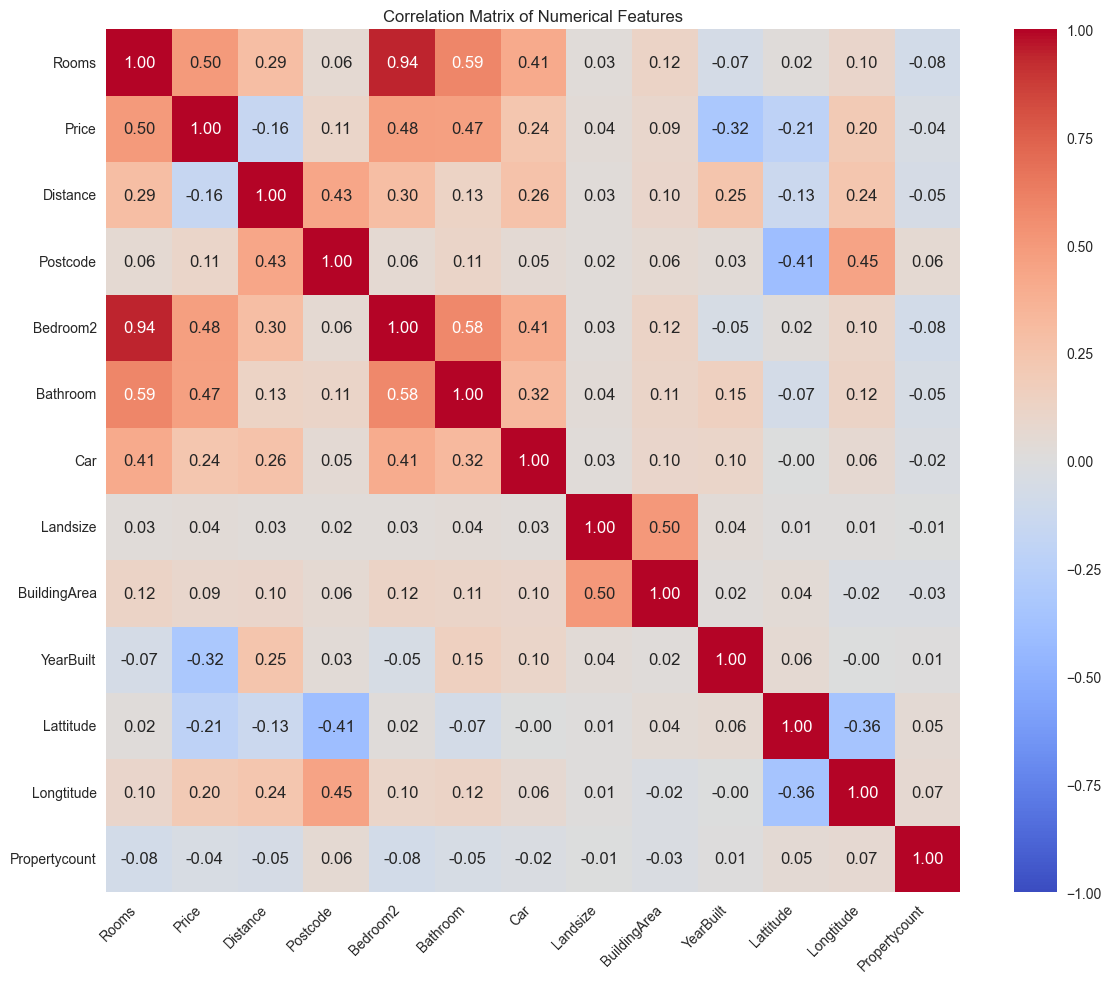

In [4]:
# Select only numerical columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Highlight correlation with the target variable (Price_Dollars)
target_correlations = correlation_matrix['Price'].sort_values(ascending=False)
print("Correlation with Price_Dollars:")
print(target_correlations)

# Display the heatmap
plt.show()

## Analysis on Relationships between Columns

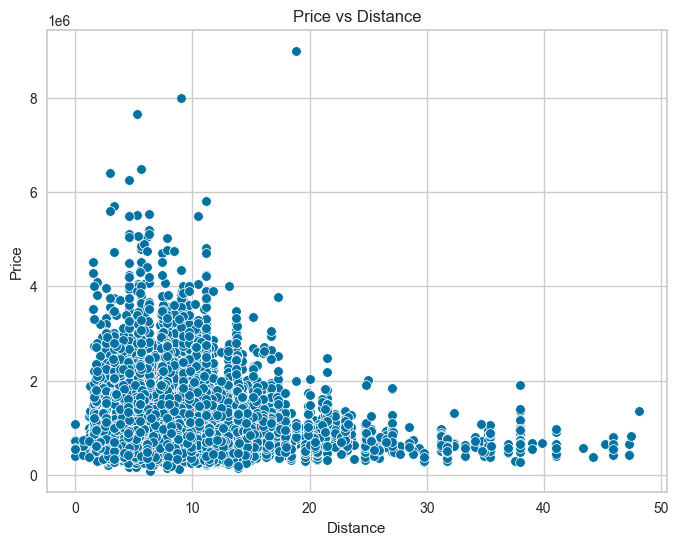

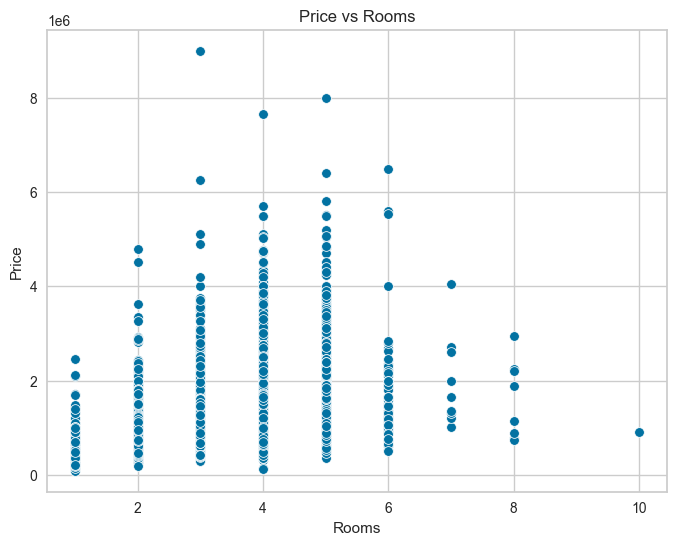

In [13]:
# Scatter plots for relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Price vs Distance')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rooms', y='Price', data=df)
plt.title('Price vs Rooms')
plt.show()

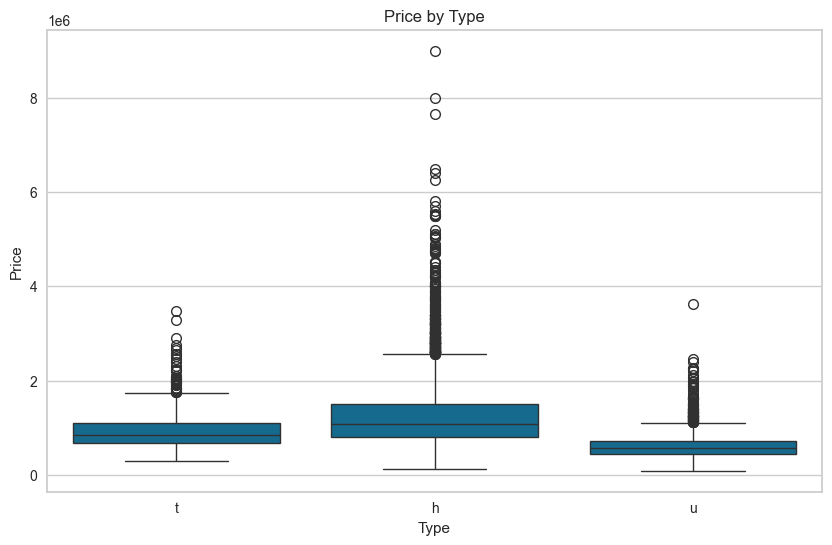

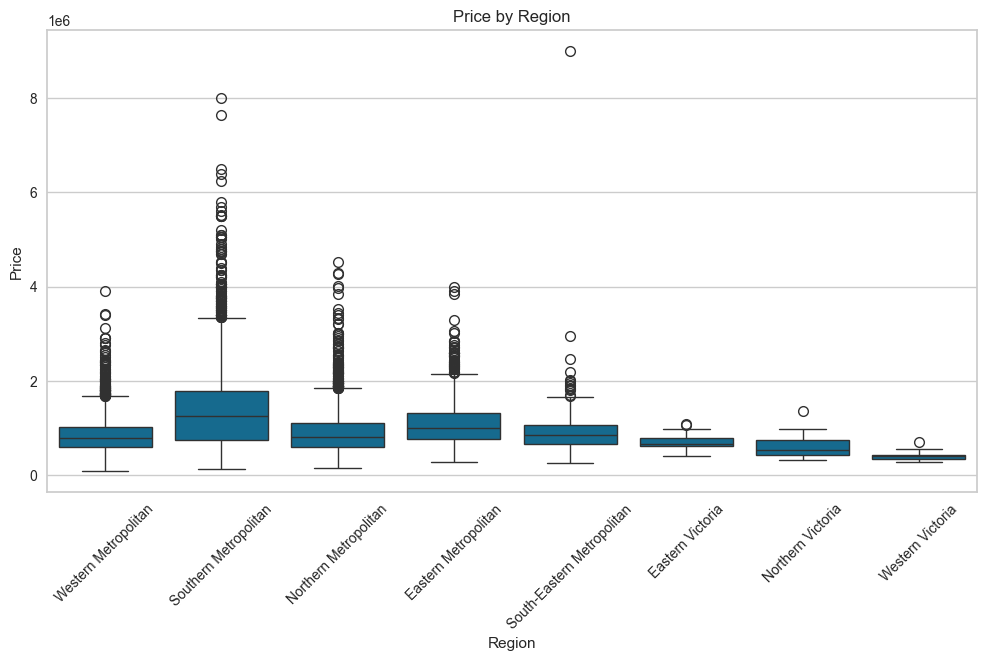

In [14]:
# Boxplots for Price by categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price by Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Price', data=df)
plt.title('Price by Region')
plt.xticks(rotation=45)
plt.show()

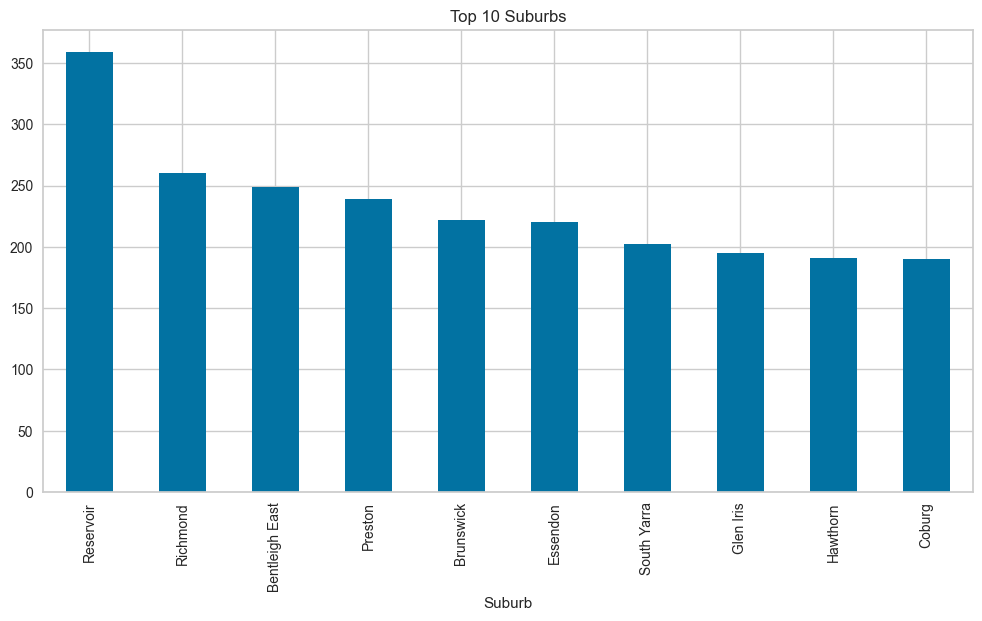

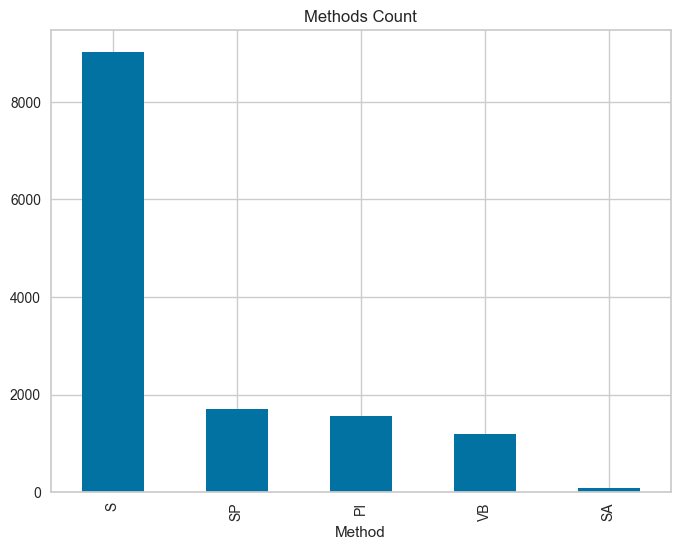

In [15]:
# Bar plots for categorical counts
plt.figure(figsize=(12, 6))
df['Suburb'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Suburbs')
plt.show()

plt.figure(figsize=(8, 6))
df['Method'].value_counts().plot(kind='bar')
plt.title('Methods Count')
plt.show()

# EDA Summary: 

- Outliers will need to be removed
- Houses far away from the CBD seems to be worth less - Housing in the CBD are worth more.
- Housing type 'h' are generally worth more. However, the plot is skewed but price outliers more than 6e6.
- Highly skewed columns should have transformation applied.
- There is no duplicate rows in the data.
- There are null values in the data.
    - YearBuilt: 5375 rows missing. This is ~40% of the dataset, which would be too much to remove. Imputaton via median year by Suburb or Region is viable.
    - CouncilArea: 1369 rows missing. Imputation with a new category using mode, since PyCaret can handle categorical missing values.
    - BuildingArea: 6450 rows missing. Median imputation is possible
    - Car: 62 rows missing. Removal can be performed as the portion of data removed is very small.

# Task 2: Data Cleaning Process


### Rename columns for interpratability

In [55]:
# Renamed based on the legend
df_cleaned = df.rename(columns={
    'Suburb': 'Suburb',
    'Address': 'Address',
    'Rooms': 'Rooms',
    'Type': 'Property_Type',
    'Price': 'Price_Dollars',
    'Method': 'Sale_Method',
    'Seller': 'Real_Estate_Agent',
    'Date': 'Sale_Date',
    'Distance': 'Distance_to_CBD_km',
    'Postcode': 'Postal_Code',
    'Bedroom2': 'Scraped_Bedrooms',
    'Bathroom': 'Bathrooms',
    'Car': 'Parking_Spaces',
    'Landsize': 'Land_Size',
    'BuildingArea': 'Building_Size',
    'YearBuilt': 'Year_Built',
    'CouncilArea': 'Governing_Council',
    'Lattitude': 'Latitude',
    'Longtitude': 'Longitude',
    'Region': 'Region',
    'Propertycount': 'Suburb_Property_Count'
})

In [56]:
df_cleaned.head()

,Suburb,Address,Rooms,Property_Type,Price_Dollars,Sale_Method,Real_Estate_Agent,Sale_Date,Distance_to_CBD_km,Postal_Code,...,Bathrooms,Parking_Spaces,Land_Size,Building_Size,Year_Built,Governing_Council,Latitude,Longitude,Region,Suburb_Property_Count
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


### Convert columns to the correct data types based on the legend and analysis

In [57]:
df_cleaned['Sale_Date'] = pd.to_datetime(df_cleaned['Sale_Date'], format='%d/%m/%Y', dayfirst=True, errors='coerce')

In [58]:
df_cleaned = df_cleaned.astype({
    'Suburb': 'object',
    'Address': 'object',
    'Rooms': 'int64',
    'Property_Type': 'category',
    'Price_Dollars': 'float64',
    'Sale_Method': 'category',
    'Real_Estate_Agent': 'object',
    'Sale_Date': 'datetime64[ns]',
    'Distance_to_CBD_km': 'float64',
    'Postal_Code': 'int64',
    'Scraped_Bedrooms': 'int64',
    'Bathrooms': 'int64',
    'Parking_Spaces': 'float64',
    'Land_Size': 'float64',
    'Building_Size': 'float64',
    'Year_Built': 'float64',
    'Governing_Council': 'object',
    'Latitude': 'float64',
    'Longitude': 'float64',
    'Region': 'category',
    'Suburb_Property_Count': 'int64'
})

## Drop Correlated Columns & Unneccessary Columns
Criteria for Dropping Columns:

1. Irrelevant or Identifier columns (Low collinearity / Less than 0.2 with target)
    - Address
    - Real Estate Agent
    - Sale Date
    - Property Count
    - Postal Code
2. Redundancy or Multicollinearity
   - Scraped_Bedrooms as it has high collinearity with Rooms
   - Bathrooms
3. Domain Knowledge
   - Suburb

In [59]:
columns_to_drop = ['Address', 'Real_Estate_Agent', 'Sale_Date', 'Suburb_Property_Count', 'Postal_Code', 'Scraped_Bedrooms', 'Suburb', 'Bathrooms']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

### Remove null rows from Parking_Spaces column

In [60]:
df_cleaned.dropna(subset=['Parking_Spaces'], inplace=True)

### Ensure Region Column Naming Format is consistent.

This will be important for using feature_selection feature in PyCaret.

In [61]:
df_cleaned['Region'] = (
    df_cleaned['Region']
      .astype(str)  # convert categorical → string
      .str.strip()
      .str.replace(r'[\s\-\u2013\u2014]+', '', regex=True)
)

# If you still want it as categorical:
df_cleaned['Region'] = df_cleaned['Region'].astype('category')
print(df_cleaned['Region'].unique())

['WesternMetropolitan', 'SouthernMetropolitan', 'NorthernMetropolitan', 'EasternMetropolitan', 'SouthEasternMetropolitan', 'EasternVictoria', 'NorthernVictoria', 'WesternVictoria']
Categories (8, object): ['EasternMetropolitan', 'EasternVictoria', 'NorthernMetropolitan', 'NorthernVictoria', 'SouthEasternMetropolitan', 'SouthernMetropolitan', 'WesternMetropolitan', 'WesternVictoria']


## Remove Numerical Outliers

### Address extreme outliers: Land_Size and Building_Size (Skewness > 3)

In [62]:
for col in ['Land_Size', 'Building_Size']:
    upper_limit = df_cleaned[col].quantile(0.99)
    df_cleaned[col] = df_cleaned[col].clip(upper=upper_limit)

In [63]:
df_cleaned['Land_Size'] = np.log1p(df_cleaned['Land_Size'].replace(0, np.nan).fillna(df_cleaned['Land_Size'].median()))
df_cleaned['Building_Size'] = np.log1p(df_cleaned['Building_Size'].replace(0, np.nan).fillna(df_cleaned['Building_Size'].median()))

In [64]:
print(df_cleaned['Land_Size'].skew())

-0.5846173127829157


In [65]:
print(df_cleaned['Building_Size'].skew())

-2.532895843404938


### Address moderate outliers (1 < Skewness < 3)

## Feature Engineering

In [66]:
# Feature engineering
df_cleaned['Property_Age'] = 2025 - df_cleaned['Year_Built'].fillna(2025)

In [67]:
df_cleaned.drop(columns=['Year_Built'], inplace=True)

### Cleaned Dataset Results

In [68]:
df.shape

(13580, 21)

In [69]:
df_cleaned.shape

(13518, 13)

In [70]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Rooms               13518 non-null  int64   
 1   Property_Type       13518 non-null  category
 2   Price_Dollars       13518 non-null  float64 
 3   Sale_Method         13518 non-null  category
 4   Distance_to_CBD_km  13518 non-null  float64 
 5   Parking_Spaces      13518 non-null  float64 
 6   Land_Size           13518 non-null  float64 
 7   Building_Size       13518 non-null  float64 
 8   Governing_Council   12211 non-null  object  
 9   Latitude            13518 non-null  float64 
 10  Longitude           13518 non-null  float64 
 11  Region              13518 non-null  category
 12  Property_Age        13518 non-null  float64 
dtypes: category(3), float64(8), int64(1), object(1)
memory usage: 1.2+ MB


In [71]:
df_cleaned.head()

,Rooms,Property_Type,Price_Dollars,Sale_Method,Distance_to_CBD_km,Parking_Spaces,Land_Size,Building_Size,Governing_Council,Latitude,Longitude,Region,Property_Age
0,3,t,840000.0,PI,13.5,1.0,5.717028,5.420535,Moonee Valley,-37.7180,144.8780,WesternMetropolitan,9.0
1,2,h,1275000.0,S,3.3,0.0,4.795791,4.418841,Port Phillip,-37.8459,144.9555,SouthernMetropolitan,125.0
2,2,h,1455000.0,S,3.3,0.0,5.075174,4.844187,Port Phillip,-37.8450,144.9538,SouthernMetropolitan,0.0
3,4,h,2000000.0,S,6.4,4.0,6.749931,5.575949,Darebin,-37.7707,145.0318,NorthernMetropolitan,95.0
4,3,h,1110000.0,S,6.4,2.0,5.342334,4.844187,Yarra,-37.7854,145.0325,NorthernMetropolitan,12.0


Governing_Council    1307
dtype: int64


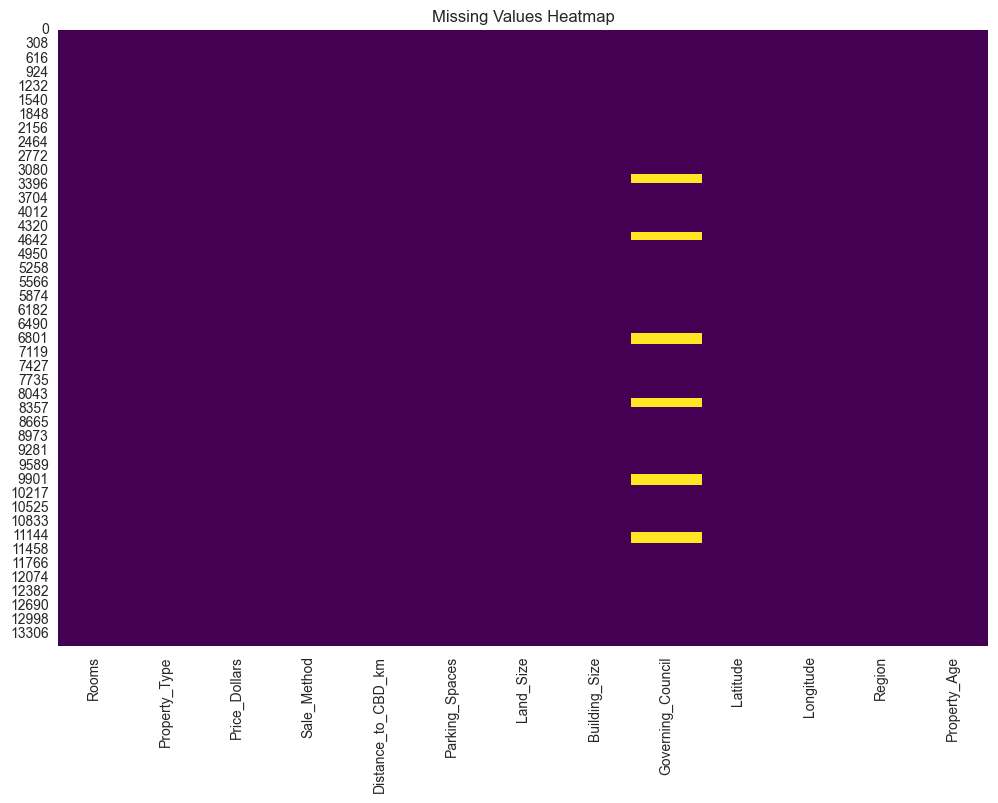

In [72]:
# Check for missing values
missing = df_cleaned.isnull().sum()
print(missing[missing > 0])
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Correlation with Price_Dollars:
Price_Dollars         1.000000
Rooms                 0.497656
Building_Size         0.377220
Parking_Spaces        0.238979
Longitude             0.204093
Property_Age          0.168664
Land_Size             0.155180
Distance_to_CBD_km   -0.161081
Latitude             -0.212444
Name: Price_Dollars, dtype: float64


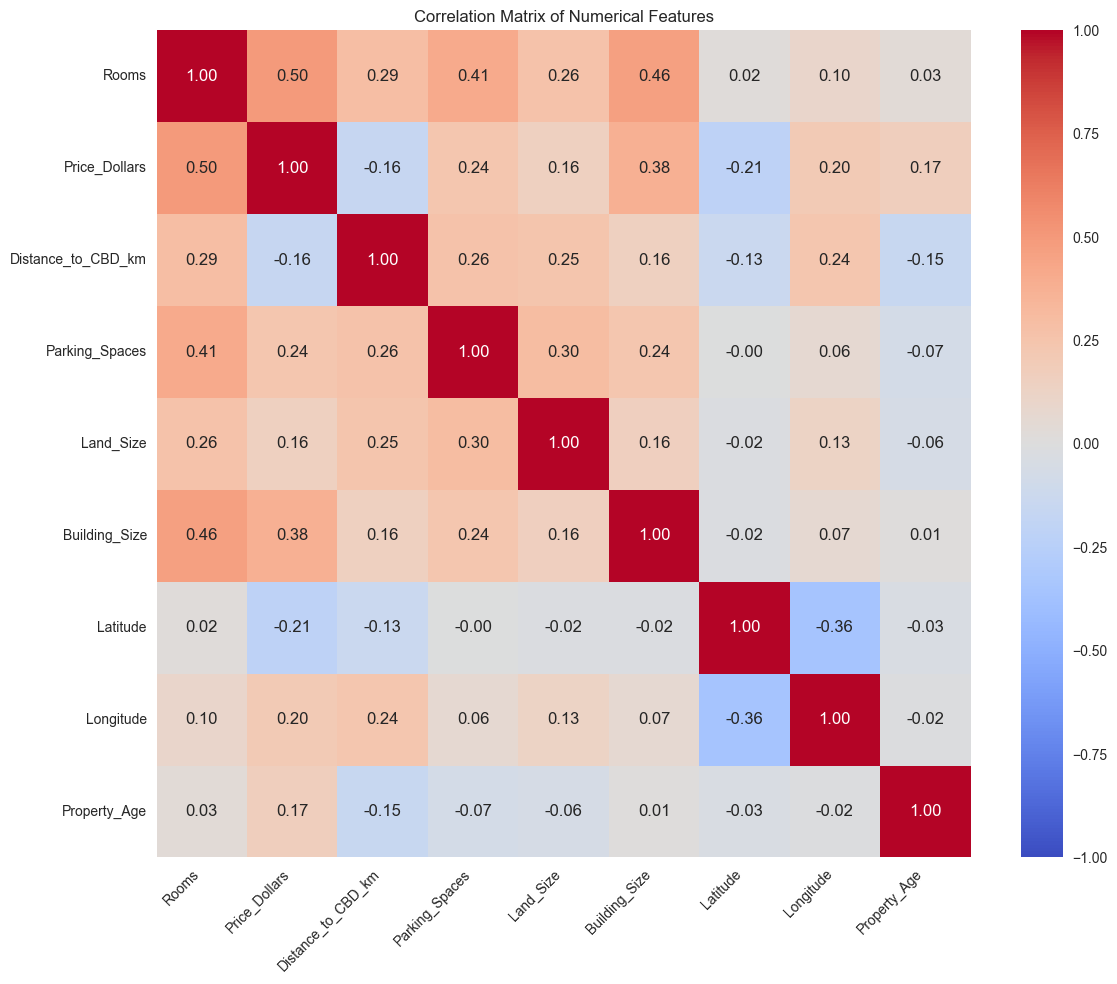

In [73]:
# Select only numerical columns for correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Highlight correlation with the target variable (Price_Dollars)
target_correlations = correlation_matrix['Price_Dollars'].sort_values(ascending=False)
print("Correlation with Price_Dollars:")
print(target_correlations)

# Display the heatmap
plt.show()

In [74]:
df_cleaned.to_csv('Melbourne_Property_Cleaned.csv', index=False)

# Task 3: Machine Learning Pipeline using PyCaret


In [2]:
data = pd.read_csv('Melbourne_Property_Cleaned.csv')

In [8]:
data.head()

,Rooms,Property_Type,Price_Dollars,Sale_Method,Distance_to_CBD_km,Parking_Spaces,Land_Size,Building_Size,Governing_Council,Latitude,Longitude,Region,Property_Age
0,3,t,840000.0,PI,13.5,1.0,5.717028,5.420535,Moonee Valley,-37.7180,144.8780,WesternMetropolitan,9.0
1,2,h,1275000.0,S,3.3,0.0,4.795791,4.418841,Port Phillip,-37.8459,144.9555,SouthernMetropolitan,125.0
2,2,h,1455000.0,S,3.3,0.0,5.075174,4.844187,Port Phillip,-37.8450,144.9538,SouthernMetropolitan,0.0
3,4,h,2000000.0,S,6.4,4.0,6.749931,5.575949,Darebin,-37.7707,145.0318,NorthernMetropolitan,95.0
4,3,h,1110000.0,S,6.4,2.0,5.342334,4.844187,Yarra,-37.7854,145.0325,NorthernMetropolitan,12.0


In [3]:
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=data.select_dtypes(include=['object']).columns)
df_encoded = encoder.fit_transform(data, data['Price_Dollars'])

In [14]:
categorical_columns = list(data.select_dtypes(include=['object']).columns)
categorical_columns

['Property_Type', 'Sale_Method', 'Governing_Council', 'Region']

In [15]:

s = setup(
    data=data,
    target='Price_Dollars',
    train_size=0.9,
    normalize=True, normalize_method='robust',
    transformation=True, transformation_method='quantile',
    bin_numeric_features=['Distance_to_CBD_km', 'Land_Size'],
    feature_selection=True, feature_selection_method='classic', n_features_to_select=0.4,
    categorical_features=categorical_columns,
    log_experiment=True,
    fold=10,
    session_id=42,
    experiment_name='melbourne_housing'
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 12166, number of used features: 25
[LightGBM] [Info] Start training from score 1072384.699984


,Description,Value
0,Session id,42
1,Target,Price_Dollars
2,Target type,Regression
3,Original data shape,"(13518, 13)"
4,Transformed data shape,"(13518, 5)"
5,Transformed train set shape,"(12166, 5)"
6,Transformed test set shape,"(1352, 5)"
7,Numeric features,8
8,Categorical features,4
9,Rows with missing values,9.7%


In [16]:
transformed_data = get_config('X')

In [17]:
numeric_data = transformed_data.select_dtypes(include='number')
print(numeric_data.skew())

Rooms                 0.375037
Distance_to_CBD_km    1.680363
Parking_Spaces        1.369676
Land_Size            -0.584617
Building_Size        -2.532897
Latitude             -0.429603
Longitude            -0.213618
Property_Age          1.385258
dtype: float64


In [18]:
X_train = get_config("X_train")

# List of remaining columns
print("Remaining columns after feature selection:")
print(X_train.columns.tolist())
print("Number of columns:", len(X_train.columns))

Remaining columns after feature selection:
['Rooms', 'Property_Type', 'Sale_Method', 'Distance_to_CBD_km', 'Parking_Spaces', 'Land_Size', 'Building_Size', 'Governing_Council', 'Latitude', 'Longitude', 'Region', 'Property_Age']
Number of columns: 12


## Training Model

In [19]:
# Train and compare models using k-fold CV with best practice metrics (MAE, RMSE, R2, MAPE)
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,261797.5002,176082405076.7308,418714.4841,0.5665,0.3465,0.2847,0.1690
rf,Random Forest Regressor,262433.4946,185676139665.7651,430042.4006,0.5428,0.3442,0.2756,0.4720
et,Extra Trees Regressor,263146.5676,188668884805.7830,433494.9941,0.5347,0.3469,0.2752,0.3090
gbr,Gradient Boosting Regressor,285018.2128,199423177461.9042,445568.3136,0.5093,0.3698,0.3137,0.3150
knn,K Neighbors Regressor,275355.3562,199219650560.0000,445635.9625,0.5087,0.3600,0.2882,0.1290
lar,Least Angle Regression,381061.3610,306333422666.1244,552616.8432,0.2450,0.4638,0.4220,0.1250
llar,Lasso Least Angle Regression,381061.4434,306333429654.6158,552616.8484,0.2450,0.4638,0.4220,0.1090
br,Bayesian Ridge,381075.0371,306333648720.8771,552616.8310,0.2450,0.4640,0.4221,0.1070
ridge,Ridge Regression,381062.9597,306333383747.6426,552616.7816,0.2450,0.4638,0.4220,0.1190
lasso,Lasso Regression,381061.4241,306333430959.9626,552616.8500,0.2450,0.4638,0.4220,0.3460


In [20]:
# Tune the best model
tuned = tune_model(best)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,259523.1985,167380757222.6307,409121.9344,0.5898,0.3533,0.2928
1,256110.5518,149269269069.4136,386353.8133,0.5664,0.3486,0.2862
2,268581.9909,229332119033.7240,478886.3321,0.5279,0.3470,0.2795
3,266822.2542,176601624440.7715,420239.9605,0.5915,0.3449,0.2848
4,269124.6132,179664171505.1371,423868.1063,0.5615,0.3548,0.2976
5,254226.8687,159763191889.9522,399703.8803,0.5982,0.3380,0.2789
6,278300.3647,205534065326.1699,453358.6498,0.5364,0.3507,0.2884
7,264046.0015,167887465001.3924,409740.7290,0.5295,0.3451,0.2787
8,256821.1358,172676081549.1496,415543.1164,0.5361,0.3396,0.2760


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


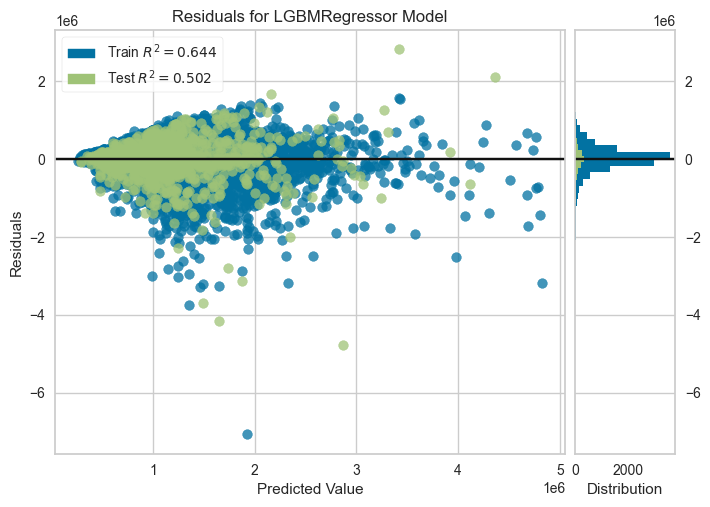

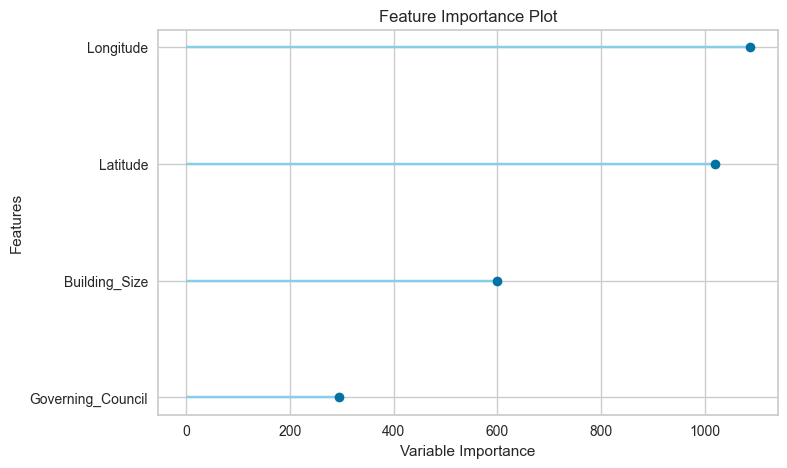

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
# Analyze model performance on test set (predictive analytics)
plot_model(tuned, plot='residuals')
plot_model(tuned, plot='feature')
evaluate_model(tuned)


In [22]:
# Generate predictions on unseen hold-out data
predictions = predict_model(tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,289569.5263,218077491590.1810,466987.6782,0.5021,0.3762,0.3187


In [23]:
# Finalize the model for deployment
final_model = finalize_model(tuned)


In [24]:
# Save the entire pipeline
save_model(final_model, 'melbourne_housing_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Rooms', 'Distance_to_CBD_km',
                                              'Parking_Spaces', 'Land_Size',
                                              'Building_Size', 'Latitude',
                                              'Longitude', 'Property_Age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Property_Type', 'Sale_Method',
                                              'Governing_Council', 'Region'],
                                     tr...
                  TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                     random_state=42))),
                 ('normalize', TransformerWrapper(transformer=RobustScaler())),
                 ('feature_selection',
 

# Model Evaluation

In [3]:
melbourne_model = load_model('melbourne_housing_model')

Transformation Pipeline and Model Successfully Loaded


In [6]:
evaluate_model(melbourne_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [71]:
# Register the model with MLFlow for tracking and reproducibility
# Get the latest run ID from the experiment
experiment = mlflow.get_experiment_by_name('melbourne_housing')
runs = mlflow.search_runs(experiment_ids=experiment.experiment_id, order_by=['start_time DESC'])
last_run_id = runs.iloc[0].run_id
model_uri = f'runs:/{last_run_id}/model'
mlflow.register_model(model_uri, 'MelbourneHousingModel')


IndexError: single positional indexer is out-of-bounds